In [213]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='73d6982a-a023-4c7f-bfe3-13e0af77c1f7', project_access_token='p-ba936dccf3e0506d32f8c83d9cd1c01f6fe24875')
pc = project.project_context


In [214]:
# Insira seu project token aqui

In [215]:
!pip install cloudant
!pip install scikit-learn --upgrade
!pip install xgboost==0.90
!pip install imblearn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)
Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


In [216]:
from cloudant import Cloudant
# PEGAR AS INFROMAÇÕES ABAIXO NA ABA CREDENTIALS DO SERVIÇO DE CLOUDANT NA IBM CLOUD
u = '3a839f0e-4cba-4c3d-962f-3dc99fe63d20-bluemix'
p = 'faa9f35efd8ac0888b8e7612a027e687b5728d2efb52aaa7a5483131bcec3c23'
a = '3a839f0e-4cba-4c3d-962f-3dc99fe63d20-bluemix' # SIM, O ENDPOINT CIRADO PARA O SEU CLOUD É O MESMO QUE O USUÁRIO :-)
client = Cloudant(u, p, account=a, connect=True, auto_renew=True)

In [217]:

db = client['desafio7'] # NOME DO DB CRIADO NO CLOUDANT

In [218]:
response = db.all_docs(limit=17016, include_docs= True)

# put document bodies into an array
docs = []
for r in response['rows']:
    docs.append(r['doc']) # CASO TENHA USADO O NODE-RED E GRAVADO TODO O MSG USE: docs.append(r['doc']['payload'])
type(docs)

list

In [219]:
# create a Pandas dataframe containing the data
import pandas as pd
df = pd.DataFrame(data=docs)

df["LAT"] = df["LAT"].astype(float)
df["LONG"] = df["LONG"].astype(float)

df.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
17011,20,42,Brás,-23.5451,-46.6162,36,72085,52,20,21,NORMAL,32,2019-6-14,52,fbd7053c4ee6462159507926775c8df4,1-88e2ffc7f827cb814af117e914901dfb,4844
17012,33,10,Brás,-23.5451,-46.6162,11,71804,50,75,36,NORMAL,5,2019-12-12,32,fbd7053c4ee6462159507926775e9141,1-9ebe21ef83780280c65a949c6171a9df,5022
17013,20,42,Brás,-23.5451,-46.6162,36,72085,52,20,21,NORMAL,32,2019-6-14,52,fbd7053c4ee6462159507926775edda4,1-88e2ffc7f827cb814af117e914901dfb,4844
17014,19,10,Barra Funda,-23.5542,-46.6707,40,147575,47,19,10,NORMAL,37,2018-9-3,15,fbd7053c4ee64621595079267774d9bf,1-cc1146958d14d7c8a7d27ba54806e817,5283
17015,41,2,Barra Funda,-23.5542,-46.6707,43,149141,11,40,28,NORMAL,19,2018-9-29,46,fbd7053c4ee6462159507926777711a2,1-2349a3ca9ed09518c4332779ddd3cba0,5309


In [220]:
#import pixiedust
#display(df)

# Tirando linhas duplicadas

In [221]:
dfclean=df.drop_duplicates()
dfclean = dfclean.sort_values(by=['row'])
dfclean = dfclean.reset_index(drop=True)
dfclean.shape

(17016, 17)

In [222]:
dfclean.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
17011,29,43,Hospital São Paulo,-23.5984,-46.6455,13,26720,21,21,13,REABASTECER,3,2019-12-21,59,2f56066a8fcc957d389a7fcb240a2ff0,1-94331f9171b725f43c5f1613301cdd59,17007
17012,17,31,Hospital São Paulo,-23.5984,-46.6455,43,25250,63,66,43,NORMAL,29,2019-12-25,34,73b2ba6ba9f05812d2875621b9e6142f,1-42d2291403c002025301cad4b6bb28d4,17011
17013,35,10,Hospital São Paulo,-23.5984,-46.6455,22,26759,42,9,26,NORMAL,8,2019-12-30,56,d849c3dec557487c056534d2d8ea8506,1-c00d7d7548801a84416ee24f453cba41,17016
17014,35,10,Hospital São Paulo,-23.5984,-46.6455,22,26759,42,9,26,NORMAL,8,2019-12-30,56,d248d336496e14d4b01f8689a7b4c45a,1-c00d7d7548801a84416ee24f453cba41,17016
17015,35,10,Hospital São Paulo,-23.5984,-46.6455,22,26759,42,9,26,NORMAL,8,2019-12-30,56,26e44fb96bb0b4fef483426895c707da,1-c00d7d7548801a84416ee24f453cba41,17016


## Drop index outliers

In [223]:
dfclean.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
0,43,43,Paraíso,-23.57677,-46.63933,43,70277,65,86,43,NORMAL,43,2018-1-1,65,0260a43f12998b7f7479fe7ca7a53a6f,1-0609dee68e4089f80c835fcccf05baa1,1
1,41,42,Paraíso,-23.57677,-46.63933,38,73302,58,73,39,NORMAL,37,2018-1-2,58,8b0d1c5877525e532548d2e5424b1141,1-b35fcaabab4ed3bfa24fee506fc262cd,2
2,41,42,Paraíso,-23.57677,-46.63933,38,73302,58,73,39,NORMAL,37,2018-1-2,58,657ab1d6bf78a91e85e68e94fe06ffd4,1-b35fcaabab4ed3bfa24fee506fc262cd,2
3,41,42,Paraíso,-23.57677,-46.63933,38,73302,58,73,39,NORMAL,37,2018-1-2,58,d248d336496e14d4b01f8689a7b3f6ef,1-b35fcaabab4ed3bfa24fee506fc262cd,2
4,30,35,Paraíso,-23.57677,-46.63933,20,73062,35,31,23,NORMAL,18,2018-1-6,26,b23e7091d4479dbf5c37709119da76b8,1-0af24bfe22dbeb1cdc99fa86e5271dc5,6


In [224]:
dfclean = dfclean.drop([
    dfclean.index[4843] , 
    dfclean.index[7052],
    dfclean.index[7053],
    dfclean.index[11099],
    dfclean.index[13348],
    dfclean.index[16498],
    dfclean.index[16499],
    dfclean.index[16927],
    dfclean.index[45],
    dfclean.index[46],
    dfclean.index[1409],
    dfclean.index[1420],
    dfclean.index[1421],
    dfclean.index[2731],
    dfclean.index[3012],
    dfclean.index[3013],
    dfclean.index[3014],
    dfclean.index[4535],
    dfclean.index[8373],
    dfclean.index[9761],
    dfclean.index[12424],
    dfclean.index[12427],
    dfclean.index[15238],
    dfclean.index[15570],
    dfclean.index[10766],
    dfclean.index[1422]
])

In [225]:
dfclean.head()
dfclean.shape

(16990, 17)

In [226]:
sabores=['Açaí-Guaraná','Citrus','Maçã-Verde','Original_269','Original_473','Pêssego','Tangerina','Zero']
dfclean[sabores]=dfclean[sabores].astype(int)
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16990 entries, 0 to 17015
Data columns (total 17 columns):
Açaí-Guaraná    16990 non-null int64
Citrus          16990 non-null int64
Estação         16990 non-null object
LAT             16990 non-null float64
LONG            16990 non-null float64
Maçã-Verde      16990 non-null int64
Movimentação    16990 non-null object
Original_269    16990 non-null int64
Original_473    16990 non-null int64
Pêssego         16990 non-null int64
TARGET          16990 non-null object
Tangerina       16990 non-null int64
Tempo           16990 non-null object
Zero            16990 non-null int64
_id             16990 non-null object
_rev            16990 non-null object
row             16990 non-null int64
dtypes: float64(2), int64(9), object(6)
memory usage: 2.3+ MB


# Fazendo RFECV e Drop de colunas

In [227]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [228]:
dfclean.drop(['Estação','LAT','LONG','Movimentação','Tempo','row','_id','_rev'],axis=1,inplace=True)
dfclean.head()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero
0,43,43,43,65,86,43,NORMAL,43,65
1,41,42,38,58,73,39,NORMAL,37,58
2,41,42,38,58,73,39,NORMAL,37,58
3,41,42,38,58,73,39,NORMAL,37,58
4,30,35,20,35,31,23,NORMAL,18,26


## RFECV

In [119]:
Y = dfclean['TARGET']
X = dfclean.drop(['TARGET'], axis='columns')
xgb = XGBClassifier()
gbc =  GradientBoostingClassifier()
rfc = RandomForestClassifier()
rfe = RFECV(estimator=rfc)
rfe.fit(X,Y)
rfe.n_features_

KeyboardInterrupt: 

In [ ]:
colunas = pd.DataFrame({'coluna':X.columns,
              'bool': rfe.support_})
colunas

In [129]:
dfclean.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,Media
16985,29,43,13,21,21,13,REABASTECER,3,59,25.25
16986,17,31,43,63,66,43,NORMAL,29,34,40.75
16987,35,10,22,42,9,26,NORMAL,8,56,26.00
16988,35,10,22,42,9,26,NORMAL,8,56,26.00
16989,35,10,22,42,9,26,NORMAL,8,56,26.00


# Inserindo Média dos sabores na tabela

In [229]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [230]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(dfclean.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=dfclean)

# Reconstruindo um Pandas DataFrame com os resultados
dfclean = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=dfclean
    ),
    columns=dfclean.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(dfclean.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Maçã-Verde      0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Zero            0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Maçã-Verde      0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Zero            0
dtype: int64



In [231]:
dfclean['Media']=dfclean[sabores].mean(axis=1)
dfclean.head()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,Media
0,43,43,43,65,86,43,NORMAL,43,65,53.875
1,41,42,38,58,73,39,NORMAL,37,58,48.250
2,41,42,38,58,73,39,NORMAL,37,58,48.250
3,41,42,38,58,73,39,NORMAL,37,58,48.250
4,30,35,20,35,31,23,NORMAL,18,26,27.250


In [232]:
print(dfclean['Zero'].mean(), dfclean['Zero'].median())


35.30470865214832 35.0


# Heatmap

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
#função para criar heatmap
def criar_heatmap(corr):
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=np.bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

TypeError: 'float' object cannot be interpreted as an integer

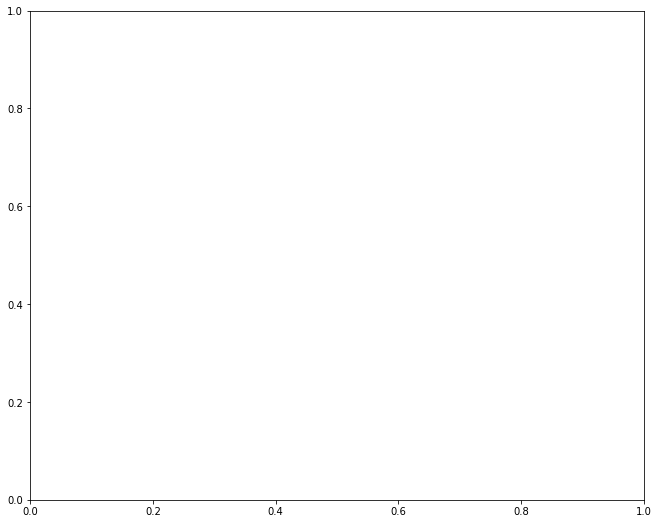

In [235]:
#mapa de correlação
corr = dfclean.corr()
criar_heatmap(corr)

# Definindo Features, fazendo balanceamento, treinando modelo e Matriz de Confusão

In [206]:
features = dfclean.drop(['TARGET'],axis=1)
target = dfclean['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
print("Quantidade normal é:", (target == 'NORMAL').sum())
print("Quantidade para Reabastecer é:", (target == 'REABASTECER').sum())

Quantidade normal é: 11369
Quantidade para Reabastecer é: 5647


In [207]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [208]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE,SVMSMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.under_sampling import TomekLinks,RandomUnderSampler
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=337)


In [209]:
print(X_train.shape)
smote = SMOTE(random_state=337)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape)

(13612, 9)
(18148, 9)


In [210]:
print("Quantidade normal é:", (y_train == 'NORMAL').sum())
print("Quantidade para Reabastecer é:", (y_train == 'REABASTECER').sum())

Quantidade normal é: 9074
Quantidade para Reabastecer é: 9074


In [211]:
Classificadores = [
    BaggingClassifier(
        DecisionTreeClassifier(),
        n_estimators = 100, 
        max_features = 0.5,
        max_samples= 0.5
    ),
]

Acurácia do BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_

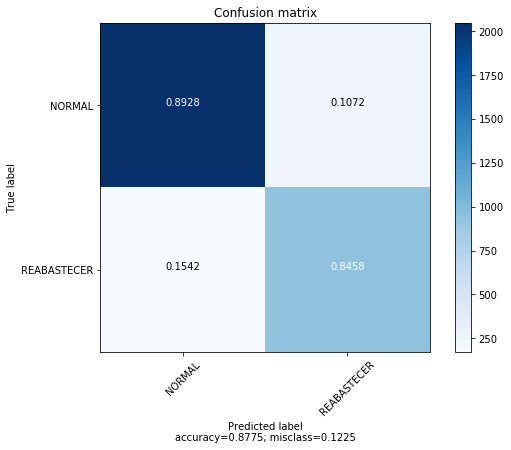

In [212]:
from sklearn.metrics import f1_score

for Classificador in Classificadores:
    dtc = Classificador
    y_pred = dtc.fit(X_train, y_train).predict(X_test)
    print("Acurácia do",Classificador,": {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))
    print("F1 micro do",Classificador,":",f1_score(y_test, y_pred, average='micro'))
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL','REABASTECER'])

## Tunando RandomForest e Gradient Boost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

correct_test = correct_data(test)
testX = correct_test[predictor].values
result = clf.predict(X_test)

## XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [ ]:
y_pred2 = XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=5,
              n_estimators=600, nthread=1, silent=True, subsample=0.6).fit(X_train, y_train).predict(X_test)
print("{}%".format(100*round(accuracy_score(y_test, y_pred2), 2)))
print(classification_report(y_test, y_pred2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred2), ['NORMAL','REABASTECER'])

## Neural Network

In [ ]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

In [ ]:
print(clf.best_params_)

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

## Decision

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3,n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 716 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:   37.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [70]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=84,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## PyCaret

In [28]:
!pip install pycaret

In [29]:
import pycaret  
from pycaret.classification import * 
from pycaret.utils import enable_colab   

In [30]:
!pip install cython==0.28

In [47]:
reg = setup(data = dfclean,           # Banco de dados
              target = 'TARGET',   # Desfecho que estamos tentando prever
              train_size = 0.7,remove_outliers = True,fix_imbalance = True)     # Proporção do banco de treino

Setup Succesfully Completed!


,Description,Value
0,session_id,3040
1,Target Type,Binary
2,Label Encoded,"NORMAL: 0, REABASTECER: 1"
3,Original Data,"(17016, 10)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [52]:
xgboost = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8551,0.8422,0.8049,0.7635,0.7836,0.6749,0.6754
1,0.8746,0.8622,0.8266,0.7963,0.8112,0.7173,0.7176
2,0.8445,0.8294,0.7859,0.7494,0.7672,0.6506,0.651
3,0.8604,0.851,0.8238,0.7657,0.7937,0.6885,0.6895
4,0.8719,0.8567,0.813,0.7979,0.8054,0.7099,0.71
5,0.8718,0.8557,0.8098,0.7989,0.8043,0.709,0.709
6,0.8815,0.8721,0.8451,0.8015,0.8228,0.7339,0.7344
7,0.8488,0.8373,0.8043,0.7494,0.7759,0.662,0.663
8,0.863,0.8464,0.7989,0.784,0.7914,0.6894,0.6894
9,0.8585,0.8489,0.8211,0.7632,0.7911,0.6844,0.6854


In [ ]:
pred_holdout = predict_model(xgboost)

# Folha de Respostas


In [85]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-12 02:12:03--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.1’

    [ <=>                                   ] 70,291      --.-K/s   in 0.1s    

2020-09-12 02:12:04 (530 KB/s) - ‘to_be_scored.csv.1’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [86]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [87]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


In [88]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

sabores=['Açaí-Guaraná','Citrus','Maçã-Verde','Original_269','Original_473','Pêssego','Tangerina','Zero']
df_to_be_scored_1[sabores]=df_to_be_scored_1[sabores].astype(int)
df_to_be_scored_1['Media']=df_to_be_scored_1[sabores].mean(axis=1)


# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Estação','LAT','LONG','Movimentação','Tempo'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Media
979,34,65,28,17,33,27,6,2,26.500
980,21,60,18,15,27,22,43,43,31.125
981,9,56,13,14,21,17,37,37,25.500
982,86,49,7,14,17,12,33,33,31.375
983,74,41,65,8,14,7,27,27,32.875


In [89]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Media,TARGET
979,34,65,28,17,33,27,6,2,26.500,REABASTECER
980,21,60,18,15,27,22,43,43,31.125,NORMAL
981,9,56,13,14,21,17,37,37,25.500,NORMAL
982,86,49,7,14,17,12,33,33,31.375,NORMAL
983,74,41,65,8,14,7,27,27,32.875,NORMAL


In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))